# 试卷名：新课标 高考真题 【政治】学科

--------
## 题目编号：11（含图片）
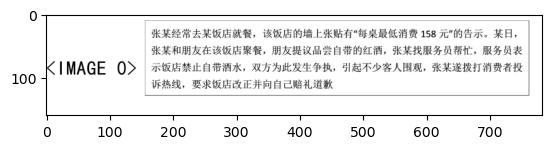
## 题目标答
①：饭店要求最低消费侵害了张某的自主选择权和公平交易的权利，不是知情权，①排除。③：格式条款是当事人为了重复使用而预先拟定，并在订立合同时未与对方协商的条款，是单方事先制定的，不能就合同条款进行协商的，设置最低消费属于典型的格式条款，③正确。②④：饭店禁止客人自带酒水，不是侵害了张某的名誉权，而是侵犯了消费者自主选择商品的权利，是不合法的。消费者享有自主选择商品或服务的权利，②错误，④正确。故本题选D。
## gpt-4o 模型输出
根据提供的图片和描述，正确的说法是：

D. ②③

解释如下：

- ②“每桌最低消费158元”属于格式条款：格式条款是指由一方当事人预先拟定，并在订立合同时未与对方协商的条款。餐厅规定的最低消费金额属于这种情况。
- ③饭店禁止自带酒水侵犯了张某的自主选择权：自主选择权是消费者在消费过程中享有的权利，禁止自带酒水限制了消费者的选择权。

其他选项的解释：

- ①饭店要求最低消费侵犯了张某的知情权：知情权是指消费者有权了解商品或服务的真实情况。最低消费的规定并不直接侵犯知情权。
- ④饭店禁止自带酒水侵犯了张某的名誉权：名誉权是指公民或法人对其名誉不受侵害的权利。禁止自带酒水与名誉权无关。


In [2]:
import re
import base64
from io import BytesIO
import requests
import json
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os
import urllib

model_path = "gpt-4o"
gen_kwargs = {"max_length": 2048, "do_sample": False}
model_name = "gpt-4o"
OPENAI_API_KEY = ""
url = "https://api.openai.com/v1/chat/completions"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {OPENAI_API_KEY}"
}





试卷名：新课标 高考真题 【政治】学科
***************
题目编号：11（含图片）


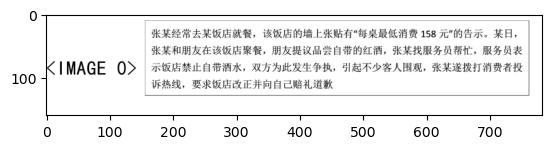

题目标答：①：饭店要求最低消费侵害了张某的自主选择权和公平交易的权利，不是知情权，①排除。③：格式条款是当事人为了重复使用而预先拟定，并在订立合同时未与对方协商的条款，是单方事先制定的，不能就合同条款进行协商的，设置最低消费属于典型的格式条款，③正确。②④：饭店禁止客人自带酒水，不是侵害了张某的名誉权，而是侵犯了消费者自主选择商品的权利，是不合法的。消费者享有自主选择商品或服务的权利，②错误，④正确。故本题选D。
gpt-4o 模型输出：根据提供的图片和描述，正确的说法是：

D. ②③

解释如下：

- ②“每桌最低消费158元”属于格式条款：格式条款是指由一方当事人预先拟定，并在订立合同时未与对方协商的条款。餐厅规定的最低消费金额属于这种情况。
- ③饭店禁止自带酒水侵犯了张某的自主选择权：自主选择权是消费者在消费过程中享有的权利，禁止自带酒水限制了消费者的选择权。

其他选项的解释：

- ①饭店要求最低消费侵犯了张某的知情权：知情权是指消费者有权了解商品或服务的真实情况。最低消费的规定并不直接侵犯知情权。
- ④饭店禁止自带酒水侵犯了张某的名誉权：名誉权是指公民或法人对其名誉不受侵害的权利。禁止自带酒水与名誉权无关。


In [3]:
def img_process(im_list):
    imgs = []
    for p in im_list:
        try:
            imgs.append(Image.open(p))
        except:
            return -1
    new_w = 0
    new_h = 0
    for im in imgs:
        w, h = im.size
        new_w = max(new_w, w)
        new_h += h + 20
    new_w += 20
    new_h += 20
    # new_w = max(512, new_w)
    # new_h = max(512, new_h)
    pad = max(new_w // 4, 100)
    font = ImageFont.truetype("src/fonts/SimHei font.ttf", pad // 5)
    new_img = Image.new('RGB', (new_w + pad, new_h), 'white')
    draw = ImageDraw.Draw(new_img)
    curr_h = 10
    for idx, im in enumerate(imgs):
        w, h = im.size
        if im.mode == 'RGBA':
            # 创建一个白色背景的图像
            background = Image.new('RGB', im.size, (255, 255, 255))
            background.paste(im, mask=im.split()[3])  # 使用透明度通道作为掩码
            im = background
        new_img.paste(im, (pad, curr_h))
        draw.text((0, curr_h + h // 2), f'<IMAGE {idx}>', font=font, fill='black')
        if idx + 1 < len(imgs):
            draw.line([(0, curr_h + h + 10), (new_w + pad, curr_h + h + 10)], fill='black', width=2)
        curr_h += h + 20
    return new_img


subject, paper_type = "政治", "新课标"
file_name = f"../data/{paper_type}/{subject}.jsonl"
pattern = r'<img .*?"/>'
mm_question_pattern = re.compile(pattern)
pattern = r'src=".*?"'
img_pattern =re.compile(pattern)
cache_dir = "./src/input/img"
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir, exist_ok=True)

questions = []

print(f"试卷名：{paper_type} 高考真题 【{subject}】学科")

with open(file_name, "r") as f:
    for idx, line in enumerate(f):
        data = json.loads(line)
        has_img, question = False, data['prompt']

        if '<img' in question:
            has_img = True
            imgs = mm_question_pattern.findall(question)
            im_list = []
            for i, img in enumerate(imgs):
                question = question.replace(img, f'<IMAGE {i}> ', 1)
                img = img_pattern.findall(img)
                assert len(img) == 1
                img = img[0].split('"')[1]
                cache_path = f"{cache_dir}/{subject}_{model_name.split()[0]}_{idx}_{i}.png"
                urllib.request.urlretrieve(img,cache_path)
                im_list.append(cache_path)
            img = img_process(im_list)


            buffered = BytesIO()
            img.save(buffered, format="JPEG")
            base64_image = base64.b64encode(buffered.getvalue()).decode('utf-8')
            payload = {
                "model": model_path,
                "messages": [
                    {
                        "role": "user",
                        "content": json.dumps([
                            {
                                "type": "text",
                                "text": question
                            },
                            {
                                "type": "image_url",
                                "image_url": {
                                    "url": f"data:image/jpeg;base64,{base64_image}"
                                }
                            }
                        ])
                    }
                ],
                "max_tokens": 4096,
                "temperature": 0.0,
            }

            response = requests.post(url, headers=headers, json=payload)
            res_content = response.json()["choices"][0]["message"]["content"]
            response = res_content

            if idx == 0:
                print("*" * 35)
            else:
                print("*" * 15)

            print("题目编号：" + str(idx + 1) + ("（含图片）" if has_img else ""))
            plt.imshow(img)
            plt.show()
            print("题目标答：" + data["answer"])
            print(f"{model_name} 模型输出：" + response)

            questions.append({
                "id": str(idx + 1),
                "question": data['prompt'],
                "answer": data["answer"],
                "output": response,
                "has_img": has_img
            })
            import time

            # Sleep for 30 seconds
            time.sleep(30)